# AI Project - Build Credit Risk Analyzer

#### Scope Of Project:
Build your custom Credit Risk Analyzer, using a decision tree model, which will predict the suspected credit card defaulters among the new applicants. The project work will broadly include two sections that you need to submit. 

### Step 1: Import the libraries

In [318]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from tabulate import tabulate
from sklearn import tree, metrics

import io

### Step 2: Import and the data

In [224]:
credRisk ="./credit_data.csv"
data = pd.read_csv(credRisk, sep=",")

### Step 3: Analyze data Informations

In [225]:
data.shape

(50636, 13)

In [226]:
data.head(15)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1
5,26,Female,Other,Student,None,None,404972,22861,Family,None,Single,0,1
6,28,Male,Under Graduate,Student,None,None,231185,20464,Family,None,Married,0,1
7,24,Female,Under Graduate,Salaried,None,Entry,102554,42159,Family,None,Married,1,1
8,26,Female,Under Graduate,Salaried,None,Junior,226786,19817,Family,None,Single,0,1
9,26,Male,Graduate,Salaried,None,Mid-level 1,250424,5271,Family,Two Wheeler,Married,1,1


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
age                  50636 non-null int64
gender               50636 non-null object
education            50636 non-null object
occupation           50636 non-null object
organization_type    50636 non-null object
seniority            50636 non-null object
annual_income        50636 non-null int64
disposable_income    50636 non-null int64
house_type           50636 non-null object
vehicle_type         50636 non-null object
marital_status       50636 non-null object
no_card              50636 non-null int64
default              50636 non-null int64
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


In [228]:
data.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


### Step 4: Analyze the exploratory data

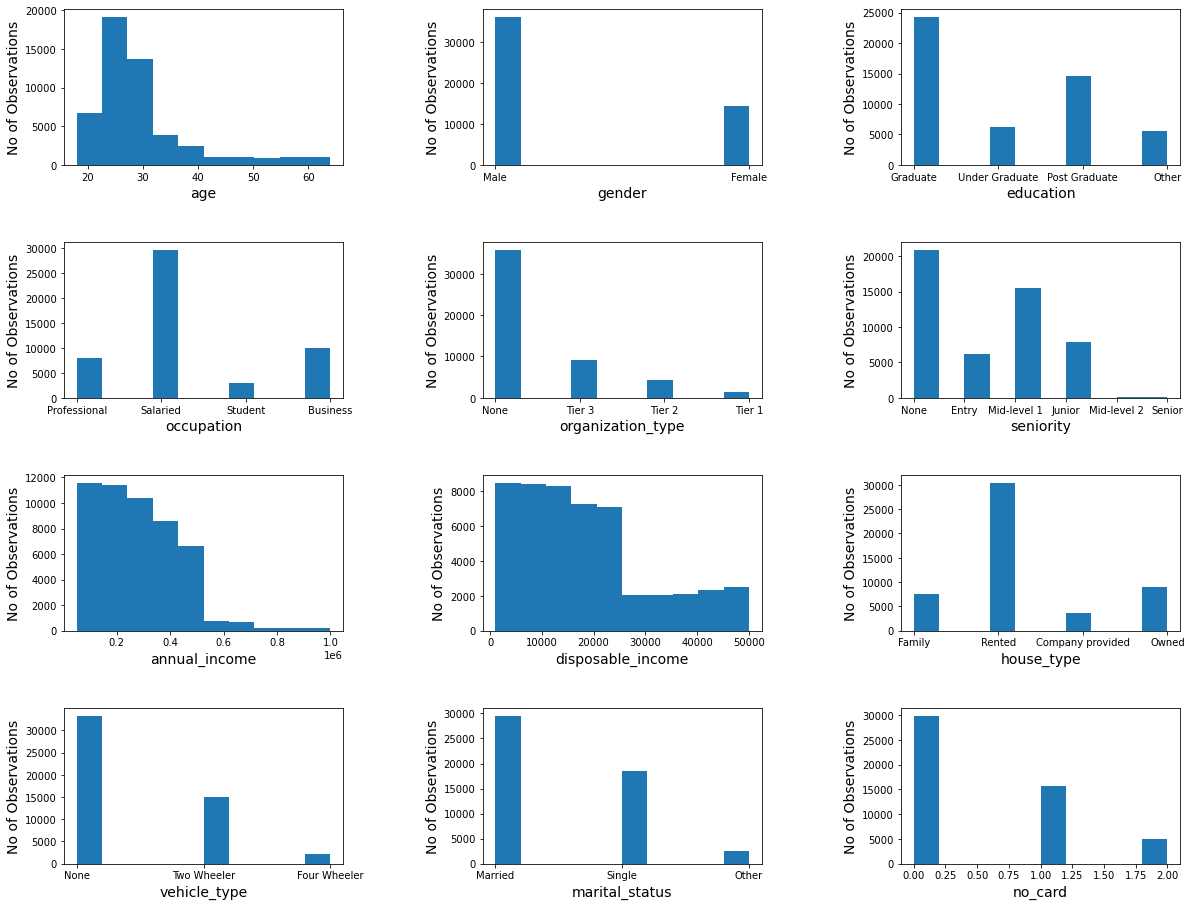

In [229]:
fig = plot.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, columns in zip(range(1, 13),data.columns):
    ax = fig.add_subplot(5, 3, i)
    ax.hist(data[columns])
    plot.xlabel(columns, fontsize="14")
    plot.ylabel('No of Observations', fontsize="14")


### Step 5: Get the plotting of defaulters

In [230]:
count=data.groupby(data["default"])['default'].count()
print(count)

default
0    42614
1     8022
Name: default, dtype: int64


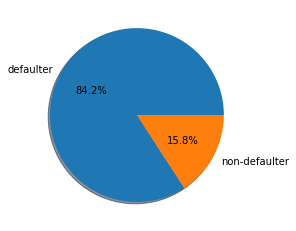

In [231]:
plot.pie(count, autopct='%1.1f%%', shadow=True, labels=['defaulter','non-defaulter']);

### Step 6: Convert the string objects to numerical data

In [320]:
columns=data[['gender','education','occupation','organization_type','seniority','house_type','vehicle_type','marital_status']]
def code_conversion(cols):
    for i in cols:
        data[i]=data[i].astype("category").cat.codes
code_conversion(columns)
data.head(15)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1
5,26,0,1,3,0,4,404972,22861,1,1,2,0,1
6,28,1,3,3,0,4,231185,20464,1,1,0,0,1
7,24,0,3,2,0,0,102554,42159,1,1,0,1,1
8,26,0,3,2,0,1,226786,19817,1,1,2,0,1
9,26,1,0,2,0,2,250424,5271,1,2,0,1,1


## Validation Method 1: Train_Test Method


### Step 7: Split the data into test and training data

In [321]:
data_train,data_test=train_test_split(data,test_size=0.3,random_state=1)

In [322]:
data_train.shape

(35445, 13)

In [323]:
data_test.shape

(15191, 13)

In [345]:
names=['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card', 'default']
x_train=data_train[names[:-1]]
x_test=data_test[names[:-1]]

y_train=data_train['default']
y_test=data_test['default']

### Step 8: Decision Tree with Entropy Criteria

In [346]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

### Step 9: Train the Decision Tree 

In [347]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Step 10: Validate the Decision Tree

In [348]:
y_pred_entropy=dtree.predict(x_test)
y_pred_entropy

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Step 11: Measure the Accuracy of Decision Tree

In [349]:
entropy=accuracy_score(y_test,y_pred_entropy)
Accuracy_entropy=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_entropy))
cm1=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm1)

Accuracy: 84.16
[[12060   714]
 [ 1692   725]]


### Step 12: Plot the Decision tree

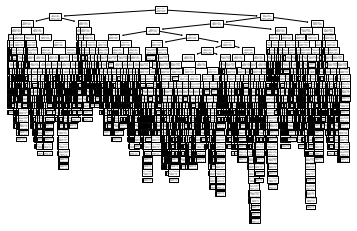

In [221]:
tree.plot_tree(dtree);

### Step 13: Decision Tree with Gini Criteria

In [329]:
dtree.gini=DecisionTreeClassifier(criterion='gini',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

### Step 14: Train the Gini Decision Tree 

In [330]:
dtree.gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Step 15: Validate the Gini Decision Tree

In [331]:
y_pred_gini=dtree.gini.predict(x_test)
y_pred_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 16: Measure the Accuracy of Gini Decision Tree

In [332]:
gini=accuracy_score(y_test,y_pred_gini)
Accuracy_gini=round(gini*100,2)
print("Accuracy: %0.2f" % (Accuracy_gini))
cm2=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm2)

Accuracy: 84.08
[[12027   705]
 [ 1713   746]]


## Validation Method 2:  K- fold Method

### Step 17: Split the data into 4 folds via K-fold methods

In [333]:
kfold= KFold(n_splits=4, random_state=1, shuffle=True)

### Step 18: Train the Decision Tree(Entropy) and test it

In [334]:
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.fit(x_train,y_train)
y_pred_entropy = cross_val_predict(dtree, x_test, y_test, cv=4)
y_pred_entropy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 19: Measure the accuracy and its standard Deviation

In [335]:
all_accuracies = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=4)
print(all_accuracies)
kfold_entropy_accuracy=round(all_accuracies.mean()*100,2)
kfold_entropy_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (kfold_entropy_accuracy,kfold_entropy_std))
cm3=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm3)

[0.8549763  0.85222246 0.84400674 0.7941858 ]
Accuracy: 83.63 +/- 0.025
[[10081   624]
 [ 1392   562]]


### Step 20: Train the Gini Decision Tree and test it

In [336]:
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.gini.fit(x_train,y_train)
y_pred_gini = cross_val_predict(dtree.gini, x_test, y_test, cv=4)
y_pred_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 21: Measure the accuracy and its standard Deviation

In [337]:
all_accuracies = cross_val_score(estimator=dtree.gini, X=x_train, y=y_train, cv=4)
print("Accuracy with each fold: %s" % (all_accuracies)) 
kfold_gini_accuracy=round(all_accuracies.mean()*100,2)
kfold_gini_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm4=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm4)

Accuracy with each fold: [0.85760927 0.85043185 0.84748262 0.79976827]
Accuracy: 83.88 +/- 0.023
[[10113   592]
 [ 1431   523]]


## Validation Method 3:  ShuffleSplit Method

### Step 22: Split the data into 4 splits via ShuffleSplit methods

In [338]:
shufflesplit = ShuffleSplit(n_splits=4, random_state=42, test_size=0.3)


### Step 23: Train the Decision Tree(Entropy) and test it

In [339]:
for train, test in shufflesplit.split(data[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']],data['default']):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.fit(x_train,y_train)
y_pred_entropy = cross_val_predict(dtree, x_test, y_test, cv=4)
y_pred_entropy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 24: Measure the accuracy and its standard Deviation

In [340]:
all_accuracies = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=4)
print("Accuracy with each shuffle: %s" % (all_accuracies)) 
shuffle_split_entropy_accuracy=round(all_accuracies.mean()*100,2)
shuffle_split_entropy_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm5=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm5)

Accuracy with each shuffle: [0.83694426 0.8409886  0.83771583 0.84087575]
Accuracy: 83.91 +/- 0.002
[[12006   768]
 [ 1735   682]]


### Step 25: Train the Decision Tree(Entropy) and test it

In [341]:
for train, test in shufflesplit.split(data[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']],data['default']):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
    x_test=data_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

    y_train=data_train['default']
    y_test=data_test['default']
    
    dtree.gini.fit(x_train,y_train)
y_pred_gini = cross_val_predict(dtree.gini, x_test, y_test, cv=4)
y_pred_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 26: Measure the accuracy and its standard Deviation

In [342]:
all_accuracies = cross_val_score(estimator=dtree.gini, X=x_train, y=y_train, cv=4)
print("Accuracy with each shuffle: %s" % (all_accuracies)) 
shuffle_split_gini_accuracy=round(all_accuracies.mean()*100,2)
shuffle_split_gini_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm6=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm6)

Accuracy with each shuffle: [0.84473031 0.83986006 0.84008577 0.84505135]
Accuracy: 84.24 +/- 0.002
[[12053   721]
 [ 1722   695]]


## Final Output 

In [354]:
print ("\t\t\t\tAccuracy by various Method")
print(tabulate([['Train_test   :', Accuracy_entropy, cm1, Accuracy_gini, cm2], ['Kfold(4-fold):','%0.2f +/- %0.3f'%(kfold_entropy_accuracy,kfold_entropy_std),cm3, '%0.2f +/- %0.3f'%(kfold_gini_accuracy,kfold_gini_std), cm4 ],["Shuffle_split:",'%0.2f +/- %0.3f'%(shuffle_split_entropy_accuracy,shuffle_split_entropy_std),cm5,'%0.2f +/- %0.3f'%(shuffle_split_gini_accuracy,shuffle_split_gini_std),cm6]], headers=['Validation Methods', 'Entropy Method','Entropy confusion Matrix','Gini Method','Gini confusion Matrix']))

				Accuracy by various Method
Validation Methods    Entropy Method    Entropy confusion Matrix    Gini Method      Gini confusion Matrix
--------------------  ----------------  --------------------------  ---------------  -----------------------
Train_test   :        84.16             [[12060   714]              84.08            [[12027   705]
                                         [ 1692   725]]                               [ 1713   746]]
Kfold(4-fold):        83.63 +/- 0.025   [[10081   624]              83.88 +/- 0.023  [[10113   592]
                                         [ 1392   562]]                               [ 1431   523]]
Shuffle_split:        83.91 +/- 0.002   [[12006   768]              84.24 +/- 0.002  [[12053   721]
                                         [ 1735   682]]                               [ 1722   695]]


Hence the Gini Criteria with shuffle split provide greatest result

# THE END